In [102]:
import time
import pandas as pd 
import numpy as np
import eli5
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model, model_selection, metrics, svm, neural_network
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.kernel_ridge import KernelRidge

In [2]:
filteredDF = pd.read_csv("filteredDF.csv", decimal=".", delimiter=",")
#shape 6805 lignes et 38 colonnes
filteredDF.columns

Index(['Unnamed: 0', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'totalKbtu', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'City', 'State', 'Location',
       'PrimaryPropertyType', 'PropertyGFAParking', 'Neighborhood',
       'NeighborhoodInt', 'BuildingType', 'PrimaryPropertyTypeInt',
       'BuildingTypeInt', 'ENERGYSTARScoreColor', 'TotalGHGEmissions'],
      dtype='object')

In [3]:
np.unique(filteredDF["GHGEmissionsIntensity(kgCO2e/ft2)"])

array([0.  , 0.01, 0.02, ...,  nan,  nan,  nan])

In [4]:
#filteredDF["PropertyGFAParking"]  = filteredDF["PropertyGFAParking"].astype(str)
filteredDF["PrimaryPropertyType"]  = filteredDF["PrimaryPropertyType"].astype(str)
#filteredDF["ListOfAllPropertyUseTypes"] = filteredDF["ListOfAllPropertyUseTypes"].astype(str)
#filteredDF["PropertyGFAParking"] = filteredDF["PropertyGFAParking"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "autre")
filteredDF.shape

(6716, 31)

<AxesSubplot:>

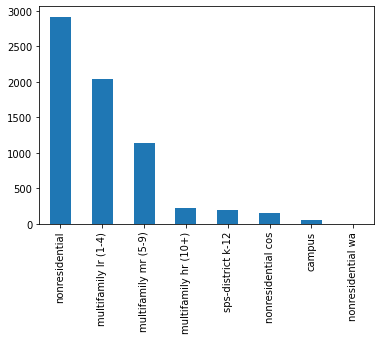

In [5]:
filteredDF["PrimaryPropertyType"]  = filteredDF["PrimaryPropertyType"].astype(str)
filteredDF["BuildingType"].value_counts().plot(kind='bar')

In [7]:
a = filteredDF["PrimaryPropertyType"].value_counts().to_frame()
a = a[a["PrimaryPropertyType"] > 1]
print(sum(a.values))
a
# faible nombre d'instances eventuellement à oublier. 

[6716]


,PrimaryPropertyType
low-rise multifamily,1985
mid-rise multifamily,1103
small- and mid-sized office,590
other,514
large office,344
k-12 school,275
mixed use property,259
high-rise multifamily,208
retail store,191
warehouse,187


Traitement de PrimaryPropertyType and Neighborhood

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a 

<AxesSubplot:>

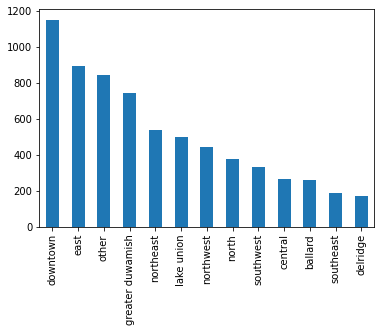

In [6]:
filteredDF2 = filteredDF
for column in filteredDF.columns:
    #print(column, str(filteredDF[column].dtype))
    if str(filteredDF[column].dtype) == "object" and column in ["PrimaryPropertyType", "City", "State", "Neighborhood"]: #"Location", "Neighborhood", "PropertyGFAParking", 
        a = filteredDF[column].value_counts().to_frame()
        a = a[a[column] > 1]
        #print(column, list(a.index.values))
        
        #filteredDF2 = filteredDF2[filteredDF2[column].isin(list(a.index.values))]
        filteredDF2[column].loc[filteredDF2[column].str.len() > 20] = "other"
        #filteredDF2[column].loc[filteredDF2[column].str.isnumeric()] = "other"
        
        filteredDF2[column] = filteredDF2[column].str.strip()
        filteredDF2[column] = filteredDF2[column].str.lower()
        filteredDF2[column] = filteredDF2[column].str.replace('"', '')
filteredDF2['Neighborhood'].value_counts().plot(kind="bar")
#filteredDF2['Location'].value_counts().plot(kind="bar")
#filteredDF2['PropertyGFAParking'].value_counts().plot(kind="bar")
#filteredDF2['Neighborhood'].loc[filteredDF2['Neighborhood'].str.len() > 20] = "other"
#filteredDF2['Neighborhood'].loc[filteredDF2['Neighborhood'].str.isnumeric()] = "other"
#filteredDF2['Neighborhood'].value_counts()

Traitement de Location

In [ ]:
#filteredDF2['Location'].value_counts()
#filteredDF2['Location'].loc[filteredDF2['Location'].str.len() > 20] = "other"
#filteredDF2['Location'].value_counts()
filteredDF2.shape

In [ ]:
#Traitement de PropertyGFAParking
#filteredDF2['PropertyGFAParking'].value_counts().to_frame()
#filteredDF2['PropertyGFAParking'].loc[filteredDF2['PropertyGFAParking'].str.isnumeric()] = "other"
#filteredDF2['PropertyGFAParking'].loc[filteredDF2['PropertyGFAParking'].str.len() > 30] = "other"
#filteredDF2['PropertyGFAParking'] = filteredDF2['PropertyGFAParking'].replace("nan", "other")
#filteredDF2['PropertyGFAParking'].value_counts().to_frame()

In [9]:
nonNullRateFrame = pd.read_csv("nonNullFrame.csv", decimal=".", delimiter=",")
nonNullRateFrame

,Unnamed: 0,columns,type,filledRatio,nbValues
0,0,OSEBuildingID,int64,100.000,3432
1,1,DataYear,int64,100.000,2
2,2,BuildingType,object,100.000,8
3,3,PrimaryPropertyType,object,100.000,29
4,4,PropertyName,object,100.000,6527
...,...,...,...,...,...
56,56,NeighborhoodInt,int64,100.000,13
57,57,BuildingTypeInt,int64,100.000,8
58,58,ENERGYSTARScoreColor,object,100.000,4
59,59,PrimaryPropertyTypeInt,int64,100.000,29


Traitement de YearBuilt et BuildingTypeInt et transformation de ces variables en numerics

In [10]:
#filteredDF2["YearBuilt"] = pd.to_numeric(filteredDF2["YearBuilt"], errors='coerce')
#filteredDF2["BuildingTypeInt"] = pd.to_numeric(filteredDF2["BuildingTypeInt"], errors='coerce')
np.unique(filteredDF2["BuildingTypeInt"].values)
filteredDF2["YearBuilt"].value_counts()

2000    70
2008    65
1999    63
1989    63
1988    63
        ..
1944     2
1939     2
1935     1
1936     1
2015     1
Name: YearBuilt, Length: 113, dtype: int64

In [11]:
# number of floors 
#filteredDF2['NumberofFloors'] = filteredDF2['NumberofFloors'].replace(np.nan, 0)
#filteredDF2 = filteredDF2[filteredDF2['GHGEmissions(MetricTonsCO2e)'] > -1000]
#filteredDF2['NumberofFloors'].value_counts()

In [12]:
# Energy Variables
#for y let's keep only rows with data
#filteredDF2['GHGEmissions(MetricTonsCO2e)'] = filteredDF2['GHGEmissions(MetricTonsCO2e)'].replace(np.nan, -1000)
#filteredDF2 = filteredDF2[filteredDF2['GHGEmissions(MetricTonsCO2e)'] > 0]

filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'] = filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].replace(np.nan, -1000)
filteredDF2 = filteredDF2[filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'] > -1000]
filteredDF2['LargestPropertyUseTypeGFA'] = filteredDF2['LargestPropertyUseTypeGFA'].replace(np.nan, -1000)
filteredDF2 = filteredDF2[filteredDF2['LargestPropertyUseTypeGFA'] > -1000]
filteredDF2['PropertyGFATotal'] = filteredDF2['PropertyGFATotal'].replace(np.nan, -1000)
filteredDF2 = filteredDF2[filteredDF2['PropertyGFATotal'] > -1000]
#filteredDF2['YearBuilt'] = filteredDF2['YearBuilt'].replace(np.nan, -1000)
#print(np.unique(filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values))
#nonNullRateFrame.columns.str.contains("kbtu")
kbtusColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kBtu")]
CO2Columns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("CO2")]
kwhColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kWh")]
listToChange = list(kwhColumns['columns'].values) + list(CO2Columns['columns'].values) + list(kbtusColumns['columns'].values)
noEnergyList = []

toTrash = ['Unnamed: 0', 
           #"ListOfAllPropertyUseTypes", 
           "Location", 
           "State", 
           "ThirdLargestPropertyUseType", 
           "PropertyGFAParking", 
           "Neighborhood", 
           "PrimaryPropertyType", 
           "NaturalGas(therms)", 
           "YearsENERGYSTARCertified", 
           "ENERGYSTARScore", 
           "ENERGYSTARScoreColor", 
           "TotalGHGEmissions", 
           "City", 
           #"YearBuilt", 
           "Address", 
           "GHGEmissionsIntensity"]
toTrash = toTrash + [
        'NumberofBuildings', 
       'PropertyGFABuilding(s)', 
        'LargestPropertyUseType', 
        "LargestPropertyUseTypeGFA",
        #"PropertyGFATotal", 
        "BuildingType", 
        "totalKbtu", 
       "NumberofFloors", 
       'ThirdLargestPropertyUseTypeGFA']


for column in filteredDF2.columns:
    if column not in listToChange and column not in toTrash:
        noEnergyList.append(column)

print("noEnergyList", noEnergyList)
#print("frameShape", filteredDF2.shape)

noEnergyList ['YearBuilt', 'PropertyGFATotal', 'NeighborhoodInt', 'PrimaryPropertyTypeInt', 'BuildingTypeInt']


# Linear Regression CO2 Metrics 

In [13]:
#Linear Regression CO2 Metrics 
y = filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1)
#y = filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1)
#LabelEncoder make a multiclass value
#y_labeled = LabelEncoder().fit_transform(filteredDF["TotalGHGEmissions"].values)

stdScaler = StandardScaler()
X = filteredDF2.filter(items=noEnergyList)

#X_std = stdScaler.fit_transform(X.values)
#print(np.unique(X_std))
#print(np.unique(y_std))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y, train_size=0.8)

regression = linear_model.LinearRegression()
#regression = linear_model.LogisticRegression(max_iter=100000)
regression.fit(X_train, y_train)

print("score", regression.score(X_test, y_test))

score 0.15457671009958784


# avec une standardisation des données

In [14]:
y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1))
#y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1))
#y = filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1)
#LabelEncoder make a multiclass value
#y_labeled = LabelEncoder().fit_transform(filteredDF["TotalGHGEmissions"].values)

stdScaler = StandardScaler()
X = filteredDF2.filter(items=noEnergyList)
rmseBaseLine = []
Y_predBaseline = []
X_std = stdScaler.fit_transform(X.values)
#print(np.unique(X_std))
#print(np.unique(y_std))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, y_std, train_size=0.7)
y_std

regression = linear_model.LinearRegression()
#regression = linear_model.LogisticRegression(max_iter=100000)
regression.fit(X_train, y_train)
Y_predBaseline.append(regression.predict(X_test))

rmseBaseLine.append(np.sqrt(metrics.mean_squared_error(y_test, Y_predBaseline[-1])))

print("score", regression.score(X_test, y_test))

score 0.34250577653715664


In [15]:
#filteredDF = filteredDF[filteredDF["GHGEmissionsIntensity"] > 0]
filteredDF["GHGEmissions(MetricTonsCO2e)"].values

array([ 2.49430e+02,  2.63510e+02,  2.06148e+03, ..., -1.00000e+00,
       -1.00000e+00, -1.00000e+00])

# With label encoder for "Neighborhood PrimaryPropertyType BuildingType"

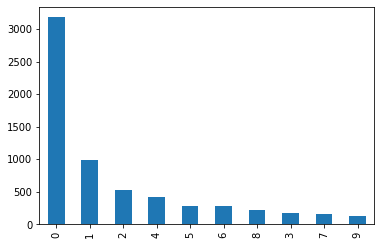

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
for column in ["Neighborhood", "PrimaryPropertyType", "BuildingType", "LargestPropertyUseType","Location", "PropertyGFAParking", "NumberofFloors", "NumberofBuildings"]:
    newCol = column+"Enc"
    filteredDF2[newCol] = encoder.fit_transform(filteredDF2[column].values)
    filteredDF2[newCol].value_counts().plot(kind="bar")
#filteredDF2["BuildingTypeEnc"].value_counts().plot(kind="bar")


# Label Encoder + Std 

In [17]:
#Label Encoder + Std 
columnsEncodedToKeep = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc']
#y = filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1)
#y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1))
y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1))

#GHGEmissionsIntensity(kgCO2e/ft2)
stdScaler = StandardScaler()
X = filteredDF2.filter(items=columnsEncodedToKeep)

X_std = stdScaler.fit_transform(X.values)
#print(np.unique(X_std))
#print(np.unique(y_std))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, y_std, train_size=0.7)

regression = linear_model.LinearRegression()
#regression = linear_model.LogisticRegression(max_iter=100000)
regression.fit(X_train, y_train)

print("score", regression.score(X_test, y_test))

score 0.16288836926422579


# Avec Grid Search 


In [91]:
lrCV = linear_model.LinearRegression()
params = {"fit_intercept": ["True", "False"], "normalize": ["True", "False"] } 
rmseLinearRegression = []
scoreLinearRegression = []
mapLinearRegression = []
Y_pred = []

now = time.time()

for cv in range(2, 10):
    lr_gs = GridSearchCV(lrCV, params, cv=cv)
    #print(lrCV.get_params().keys())
    lr_gs.fit(X_train, y_train)
    #print(cv, lr_gs.best_params_)
    #print(cv, lr_gs.best_score_)
    Y_pred.append(lr_gs.predict(X_test))
    scoreLinearRegression.append(lr_gs.best_score_)
    rmseLinearRegression.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred[-1])))
    mapLinearRegression.append(np.sqrt(metrics.mean_absolute_percentage_error(y_test, Y_pred[-1])))
    print(cv, lr_gs.best_score_, rmseLinearRegression[-1])
eli5.show_weights(lr_gs.best_estimator_, feature_names = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc'])
later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

2 0.33096997698484687 0.7872769156471641
3 0.13330263384946062 0.7872769156471641
4 0.18520710314540087 0.7872769156471641
5 0.21716926373656883 0.7872769156471641
6 0.03832370745305932 0.7872769156471641
7 0.10513901882753841 0.7872769156471641
8 0.1270973121754978 0.7872769156471641
9 -0.05490327762340573 0.7872769156471641
Calculation Time 0 seconds


# Regression ridge 

In [92]:
# paramètre de regularisation 
n_alphas = 100
alphas = np.logspace(-5, 5, 10)
coefs = []
errors = []
Y_pred_reg_ridge = []
rmse_reg_ridge = []
score_reg_ridge = []
mapRidge = []

now = time.time()

params = {"alpha": np.logspace(-5, 5, n_alphas), "normalize": ["True", "False"]}
for cv in range(2, 10):
    ridgeCV = GridSearchCV(linear_model.Ridge(), params, cv=cv)
#print(linear_model.Ridge().get_params())
    ridgeCV.fit(X_train, y_train)
    #print(cv, ridgeCV.best_score_)
    score_reg_ridge.append(ridgeCV.best_score_)
    Y_pred_reg_ridge.append(ridgeCV.predict(X_test))
    rmse_reg_ridge.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_reg_ridge[-1])))
    mapRidge.append(np.sqrt(metrics.mean_absolute_percentage_error(y_test, Y_pred_reg_ridge[-1])))
    print(cv, ridgeCV.best_score_, rmse_reg_ridge[-1])
later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

2 0.3318509114628135 0.7797292055314484
3 0.25437835666271613 0.7548191698275086
4 0.2608437303701444 0.7548191698275086
5 0.2839221702077367 0.7557447380482786
6 0.2247474974552107 0.7586524918618018
7 0.23641845966613323 0.7561782297937036
8 0.23282166367666918 0.7549204730226509
9 0.20087509417000493 0.7623327235479836
Calculation Time 11 seconds


In [65]:
eli5.show_weights(ridgeCV.best_estimator_, feature_names = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc'])

Weight?,Feature
+0.258,PropertyGFATotal
+0.036,NumberofBuildingsEnc
+0.026,BuildingTypeEnc
+0.023,NumberofFloorsEnc
+0.008,<BIAS>
+0.000,YearBuilt
-0.006,LargestPropertyUseTypeEnc
-0.009,LocationEnc
-0.017,NeighborhoodEnc
-0.021,PropertyGFAParkingEnc


# Lasso 

In [93]:
lasso = linear_model.Lasso(max_iter=10000)
params = {"alpha": np.logspace(-5, 5, n_alphas), "normalize": ["True", "False"]}
Y_pred_lasso = []
rmselasso  = []
mapLasso = []
scoreLasso  = []
lassoGS
lasso 

now = time.time()

for cv in range(2, 10):
    lassoGS = GridSearchCV(lasso, params, cv=cv)
    lassoGS.fit(X_train, y_train)
    scoreLasso.append(lassoGS.best_score_)
    Y_pred_lasso.append(lassoGS.predict(X_test))
    rmselasso.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_lasso[-1])))
    mapLasso.append(np.sqrt(metrics.mean_absolute_percentage_error(y_test, Y_pred_lasso[-1])))
    print(cv, lassoGS.best_score_, rmselasso[-1])
#Feature importance for SVM model
eli5.show_weights(lassoGS.best_estimator_, feature_names = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc'])
later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

2 0.33369632406103844 0.7718282035195119
3 0.21546760067884163 0.7627016413707415
4 0.23252106291343916 0.7638754600536702
5 0.27401541450404177 0.7635735033729817
6 0.1960564574350745 0.766549664111864
7 0.21521661093814012 0.766549664111864
8 0.21201681648849346 0.766549664111864
9 0.18474787621404584 0.7766200636189315
Calculation Time 12 seconds


# KernelRidge

In [94]:
params = {"gamma": np.logspace(-5, 5, 10), 
          "alpha": np.logspace(-5, 5, 10), 
          "kernel": ["linear", "rbf"]} 
rmse_kernel_ridge = []
map_kernel_ridge = []
score_kernel_ridge = []
Y_pred_kernel_ridge = []
now = time.time()


for cv in range(2, 6):
    kernelRidgeCV = model_selection.GridSearchCV(KernelRidge(), 
                                                 params, cv=cv, 
                                                 scoring="neg_mean_squared_error")
    kernelRidgeCV.fit(X_train, y_train)
    Y_pred_kernel_ridge.append(kernelRidgeCV.predict(X_test))
    score_kernel_ridge.append(kernelRidgeCV.best_score_)
    rmse_kernel_ridge.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_kernel_ridge[-1])))
    map_kernel_ridge.append(np.sqrt(metrics.mean_absolute_percentage_error(y_test, Y_pred_kernel_ridge[-1])))
    print(cv, kernelRidgeCV.best_score_, kernelRidgeCV.best_params_ , rmse_kernel_ridge[-1])
    
later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

2 -0.5409350938254833 {'alpha': 0.021544346900318846, 'gamma': 0.0016681005372000592, 'kernel': 'rbf'} 0.6791310702458119
3 -0.45293646359312706 {'alpha': 0.021544346900318846, 'gamma': 0.021544346900318846, 'kernel': 'rbf'} 0.6437856928341867
4 -0.5083291542171625 {'alpha': 0.021544346900318846, 'gamma': 0.021544346900318846, 'kernel': 'rbf'} 0.6437856928341867
5 -0.4780383947114311 {'alpha': 0.021544346900318846, 'gamma': 0.021544346900318846, 'kernel': 'rbf'} 0.6437856928341867
Calculation Time 282 seconds


In [95]:
#Eli5 works only with kernelRidge and linear kernel
eli5.show_weights(kernelRidgeCV.best_estimator_, feature_names = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc'])

# SVM

In [99]:
SVR = svm.LinearSVR(max_iter=100000)
# ELI5 for SVM works only with linear kernel and not rbf
parameters = {"C": np.logspace(-5, 5, 10)}#, 
              #"epsilon": np.logspace(-2, 2, 5), 
              #"kernel": ["linear", "rbf"]}
rmseLinearSVR = []
mapLinearSVR = []
scoreLinearSVR = []
Y_pred_svm = []
now = time.time()


for cv in range(2, 5):
    lr_svm = GridSearchCV(SVR, parameters, cv=cv)
    lr_svm.fit(MinMaxScaler().fit_transform(X_train), y_train.ravel())
    Y_pred_svm.append(lr_svm.predict(MinMaxScaler().fit_transform(X_test)))
    scoreLinearSVR.append(lr_svm.best_score_)
    rmseLinearSVR.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_svm[-1])))
    mapLinearSVR.append(np.sqrt(metrics.mean_absolute_percentage_error(y_test, Y_pred_svm[-1])))
    print(cv, lr_svm.best_score_, lr_svm.best_params_ , rmseLinearSVR[-1])
    
    
later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

2 0.22399696710167216 {'C': 100000.0} 0.7667528516707887


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

3 0.21415800074601374 {'C': 599.4842503189421} 0.7565006918522396


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

4 0.21017432526505359 {'C': 599.4842503189421} 0.7579415359404447
Calculation Time 150 seconds


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [82]:
#Feature importance for SVM model
eli5.show_weights(lr_svm.best_estimator_, feature_names = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc'])

# Random Forrest Regressor

In [108]:
#TODO ajouter sur le graph 
#TODO scoring mean_absolute_percentage_error
#TODO feature importance 
#import eli5
#eli5.show_weights(model, feature_names = X.columns.tolist())
Y_pred_RegressionTree = []
rmseRegressionTree = []
scoreRegressionTree = []
now = time.time()
RegressionTree = DecisionTreeRegressor()
RegressionTree.fit(X_train, y_train.ravel())
Y_pred_RegressionTree.append(RegressionTree.predict(X_test))
rmseRegressionTree.append(np.sqrt(metrics.mean_squared_error(y_test.ravel(), Y_pred_RegressionTree[-1])))
scoreRegressionTree.append(RegressionTree.score)
print(rmseRegressionTree)
eli5.show_weights(RegressionTree, feature_names = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc'])

#Calculation time
later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

[0.7015895031117428]
Calculation Time 0 seconds


# Graph Y_pred with GFA

In [ ]:
print(rmseLinearRegression)

Text(0, 0.5, 'CO2')

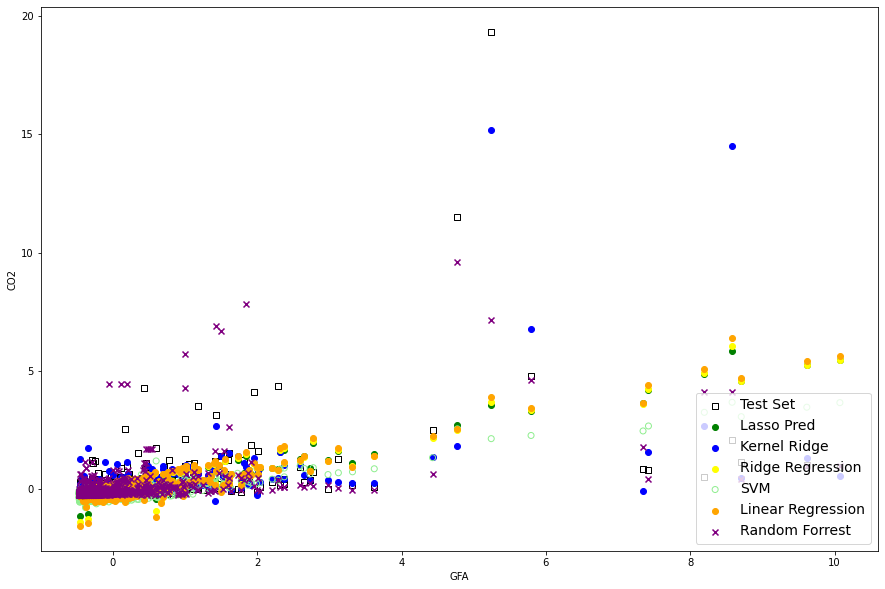

In [116]:
#A ajouter H2O pour aller à l'essentiel
#print(X_test[:, 1])
fig = plt.figure(figsize=(15, 10))
plt.scatter(X_test[:, 1], y_test, color="black", marker='s', label="Test Set", facecolors='none')
plt.scatter(X_test[:, 1], Y_pred_lasso[scoreLasso.index(max(scoreLasso))], color="green", marker='o', label="Lasso Pred")
plt.scatter(X_test[:, 1], Y_pred_kernel_ridge[score_kernel_ridge.index(max(score_kernel_ridge))], color="blue", marker='o', label="Kernel Ridge")
plt.scatter(X_test[:, 1], Y_pred_reg_ridge[score_reg_ridge.index(max(score_reg_ridge))], color="yellow", marker='o', label="Ridge Regression")
plt.scatter(X_test[:, 1], Y_pred_svm[scoreLinearSVR.index(max(scoreLinearSVR))], color="lightgreen", marker='o', label="SVM", facecolors='none')
plt.scatter(X_test[:, 1], Y_pred[scoreLinearRegression.index(max(scoreLinearRegression))], color="orange", marker='o', label="Linear Regression")
plt.scatter(X_test[:, 1], Y_pred_RegressionTree[scoreRegressionTree.index(max(scoreRegressionTree))], color="purple", marker='x', label="Random Forrest")
plt.legend(loc="lower right", fontsize=14)
#plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
#plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
#         (gridSearch.best_params_['gamma'], auc_cv))
#Ajout de la diagonale de 0.0 à 1.1
#plt.plot([0,1], [0, 1])
plt.xlabel("GFA")
plt.ylabel("CO2")

# Y_pred explanation with PrimaryPropertyTypeEnc

Text(0, 0.5, 'CO2')

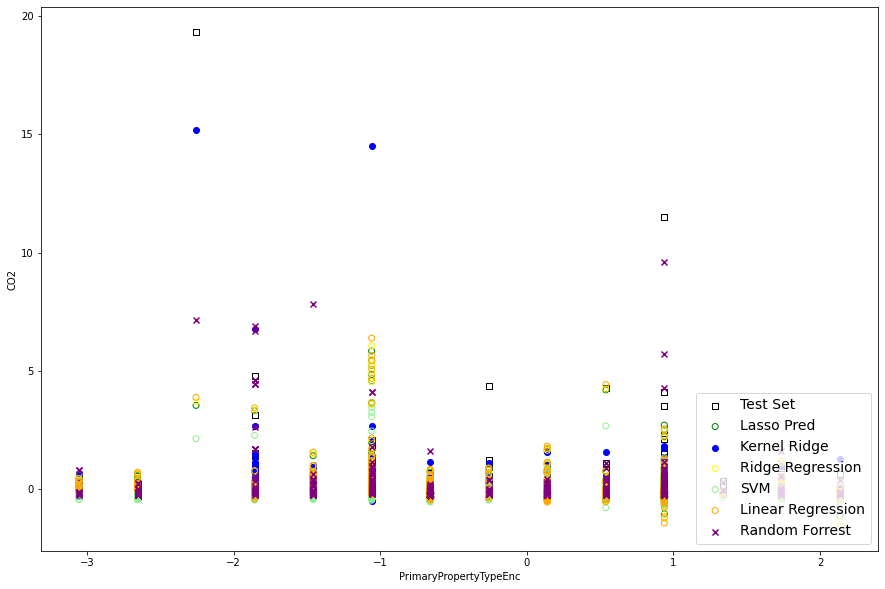

In [142]:
#A ajouter H2O pour aller à l'essentiel
#print(X_test[:, 1])
fig = plt.figure(figsize=(15, 10))
plt.scatter(X_test[:, -2], y_test, color="black", marker='s', label="Test Set", facecolors='none')
plt.scatter(X_test[:, -2], Y_pred_lasso[scoreLasso.index(max(scoreLasso))], color="green", marker='o', label="Lasso Pred", facecolors='none')
plt.scatter(X_test[:, -2], Y_pred_kernel_ridge[score_kernel_ridge.index(max(score_kernel_ridge))], color="blue", marker='o', label="Kernel Ridge")
plt.scatter(X_test[:, -2], Y_pred_reg_ridge[score_reg_ridge.index(max(score_reg_ridge))], color="yellow", marker='o', facecolors='none', label="Ridge Regression")
plt.scatter(X_test[:, -2], Y_pred_svm[scoreLinearSVR.index(max(scoreLinearSVR))], color="lightgreen", marker='o', label="SVM", facecolors='none')
plt.scatter(X_test[:, -2], Y_pred[scoreLinearRegression.index(max(scoreLinearRegression))], color="orange", marker='o', facecolors='none', label="Linear Regression")
plt.scatter(X_test[:, -2], Y_pred_RegressionTree[scoreRegressionTree.index(max(scoreRegressionTree))], color="purple", marker='x', label="Random Forrest")
plt.legend(loc="lower right", fontsize=14)
#plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
#plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
#         (gridSearch.best_params_['gamma'], auc_cv))
#Ajout de la diagonale de 0.0 à 1.1
#plt.plot([0,1], [0, 1])
plt.xlabel("PrimaryPropertyTypeEnc")
plt.ylabel("CO2")

In [200]:
green_diamond = dict(markerfacecolor='g', marker='D')
#print(X_test[:, -2])
data = [np.array(Y_pred[scoreLinearRegression.index(max(scoreLinearRegression))]).flatten(), 
        np.array(Y_pred_svm[scoreLinearSVR.index(max(scoreLinearSVR))]).flatten()] 

data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
#data = [data_1, data_2, data_3, data_4]
#ax1.boxplot(X_test[:, -2], data, flierprops=green_diamond)
print(X_test[:, -2:])
ax.set_xticklabels(['data_1', 'data_2', 
                    'data_3', 'data_4'])
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.show(bp)

[[ 0.93812818  0.74330815]
 [ 0.93812818  0.74330815]
 [ 0.53892736  0.74330815]
 ...
 [ 0.93812818  0.74330815]
 [-0.65867512 -1.05355851]
 [-1.45707677  0.74330815]]


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (4).

# Graph Errors

[0.7667528516707887, 0.7565006918522396, 0.7579415359404447]


Text(0.5, 0, 'Coefs Alpha/C')

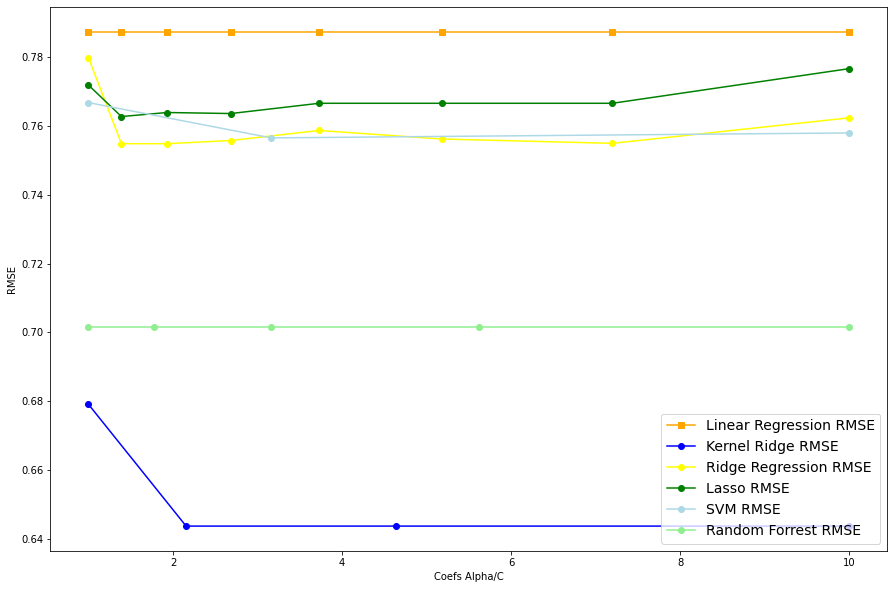

In [137]:
fig = plt.figure(figsize=(15, 10))
#np.logspace(-5, 5, 10),
print(rmseLinearSVR)
plt.plot(np.logspace(0, 1, 8), rmseLinearRegression,  color="orange", marker='s', label="Linear Regression RMSE")
plt.plot(np.logspace(0, 1, 4), rmse_kernel_ridge,  color="blue", marker='o', label="Kernel Ridge RMSE")
plt.plot(np.logspace(0, 1, 8), rmse_reg_ridge,  color="yellow", marker='o', label="Ridge Regression RMSE")
plt.plot(np.logspace(0, 1, 8), rmselasso,  color="green", marker='o', label="Lasso RMSE")
plt.plot(np.logspace(0, 1, 3), rmseLinearSVR,  color="lightblue", marker='o', label="SVM RMSE")
plt.plot(np.logspace(0, 1, 5), (rmseRegressionTree[0], rmseRegressionTree[0], rmseRegressionTree[0], rmseRegressionTree[0], rmseRegressionTree[0]) ,  color="lightgreen", marker='o', label="Random Forrest RMSE")

plt.legend(loc="lower right", fontsize=14)
plt.ylabel("RMSE")
plt.xlabel("Coefs Alpha/C")

In [135]:
(rmseRegressionTree[0], rmseRegressionTree[0], rmseRegressionTree[0], rmseRegressionTree[0], rmseRegressionTree[0])

(0.7015895031117428,
 0.7015895031117428,
 0.7015895031117428,
 0.7015895031117428,
 0.7015895031117428)

#  Multilayer Perceptron

In [ ]:
params_grid = {"alpha": list(np.logspace(0, 1, 10)) , "hidden_layer_sizes": list(range(1, 100, 10)), "solver": ["lbfgs", "sgd", "adam"], "activation" : ["identity", "logistic", "tanh", "relu"]}
rmseMultiPercpetron = []
scoreMultiPercpetron = []
Y_pred_MultiPercpetron = []

for cv in range(2, 8):
    perceptCVMLP = GridSearchCV(MLPClassifier(max_iter=1000), params_grid, cv=cv)
    perceptCVMLP.fit(X_trMinMaxScaler().fit_transform(X_train), y_train.ravel())
    Y_pred_MultiPercpetron.append(perceptCVMLP.predict(MinMaxScaler().fit_transform(X_test)))
    scoreMultiPercpetron.append(perceptCVMLP.best_score_)
    rmseMultiPercpetron.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_MultiPercpetron[-1])))

# Modelisation to predict TotalGHGEmissions
TotalGHGEmissions

# Preprocessing and Datasplit

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a 

      YearBuilt  PropertyGFATotal  LocationEnc  LargestPropertyUseTypeEnc  \
3340       1927             88434            0                         13   
3341       1996            103566            0                         13   
3342       1969            956110            0                         13   
3343       1926             61320            0                         13   
3344       1980            175580            0                         13   
...         ...               ...          ...                        ...   
6711       1990             12294            0                         24   
6712       2004             16000            0                         31   
6713       1974             13157            0                         31   
6714       1989             14101            0                         31   
6715       1938             18258            0                         31   

      PropertyGFAParkingEnc  NumberofFloorsEnc  NumberofBuildingsEnc  \
334

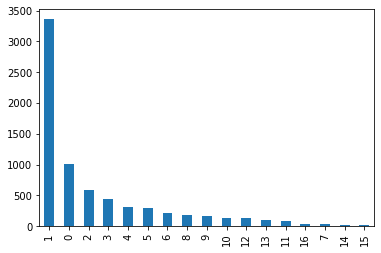

In [210]:
#Label Encoder + Std 
columnsEncodedToKeep = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc']
filteredDF3 = filteredDF

for column in filteredDF.columns:
    #print(column, str(filteredDF[column].dtype))
    if str(filteredDF[column].dtype) == "object" and column in ["PrimaryPropertyType", "City", "State", "Neighborhood"]: #"Location", "Neighborhood", "PropertyGFAParking", 
        a = filteredDF[column].value_counts().to_frame()
        a = a[a[column] > 1]
        #print(column, list(a.index.values))
        
        #filteredDF2 = filteredDF2[filteredDF2[column].isin(list(a.index.values))]
        filteredDF3[column].loc[filteredDF3[column].str.len() > 20] = "other"
        #filteredDF2[column].loc[filteredDF2[column].str.isnumeric()] = "other"
        
        filteredDF3[column] = filteredDF3[column].str.strip()
        filteredDF3[column] = filteredDF3[column].str.lower()
        filteredDF3[column] = filteredDF3[column].str.replace('"', '')
        
filteredDF3['TotalGHGEmissions'] = filteredDF3['TotalGHGEmissions'].replace(np.nan, -1000)
filteredDF3 = filteredDF3[filteredDF3['TotalGHGEmissions'] >= 0]

for column in ["Neighborhood", "PrimaryPropertyType", "BuildingType", "LargestPropertyUseType","Location", "PropertyGFAParking", "NumberofFloors", "NumberofBuildings"]:
    newCol = column+"Enc"
    filteredDF3[newCol] = encoder.fit_transform(filteredDF3[column].values)
    filteredDF3[newCol].value_counts().plot(kind="bar")



#print(filteredDF3)
#y = filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1)
#y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1))
y_std_ghge = StandardScaler().fit_transform(filteredDF3['TotalGHGEmissions'].values.reshape(-1, 1))
print(filteredDF3.filter(items=columnsEncodedToKeep))
#GHGEmissionsIntensity(kgCO2e/ft2)

stdScaler = StandardScaler()
X_ghge = filteredDF3.filter(items=columnsEncodedToKeep)

X_std = stdScaler.fit_transform(X_ghge.values)
X_train_ghge, X_test_ghge, y_train_ghge, y_test_ghge = model_selection.train_test_split(X_std, y_std_ghge, train_size=0.7)

# Linear Regression and Baseline for GHGE

In [212]:
lrCV = linear_model.LinearRegression()
params = {"fit_intercept": ["True", "False"], "normalize": ["True", "False"] } 
rmseLinearRegressionGHGE = []
Y_pred_GHGE = []
for cv in range(2, 10):
    lr_gs_GHGE = GridSearchCV(lrCV, params, cv=cv)
    #print(lrCV.get_params().keys())
    lr_gs_GHGE.fit(X_train_ghge, y_train_ghge)
    print(cv, lr_gs_GHGE.best_params_)
    print(cv, lr_gs_GHGE.best_score_)
    Y_pred_GHGE.append(lr_gs.predict(X_test_ghge))
    rmseLinearRegressionGHGE.append(np.sqrt(metrics.mean_squared_error(y_test_ghge, Y_pred_GHGE[-1])))
    print(cv, lr_gs_GHGE.best_score_, rmseLinearRegression[-1])

2 {'fit_intercept': 'True', 'normalize': 'True'}
2 0.36005037139454066
2 0.36005037139454066 0.7872769156471641
3 {'fit_intercept': 'True', 'normalize': 'True'}
3 0.19107977875093662
3 0.19107977875093662 0.7872769156471641
4 {'fit_intercept': 'True', 'normalize': 'True'}
4 0.2550034604657384
4 0.2550034604657384 0.7872769156471641
5 {'fit_intercept': 'True', 'normalize': 'True'}
5 0.29732174669800443
5 0.29732174669800443 0.7872769156471641
6 {'fit_intercept': 'True', 'normalize': 'True'}
6 0.07149186363893074
6 0.07149186363893074 0.7872769156471641
7 {'fit_intercept': 'True', 'normalize': 'True'}
7 0.22657942765609101
7 0.22657942765609101 0.7872769156471641
8 {'fit_intercept': 'True', 'normalize': 'True'}
8 0.05742830834932677
8 0.05742830834932677 0.7872769156471641
9 {'fit_intercept': 'True', 'normalize': 'True'}
9 -0.08406954059559664
9 -0.08406954059559664 0.7872769156471641


# Regression Ridge for GHGE

In [213]:
# paramètre de regularisation 
n_alphas = 100
alphas = np.logspace(-5, 5, n_alphas)
Y_pred_reg_ridge_GHGE = []
rmse_reg_ridge_GHGE = []
score_reg_ridge_GHGE = []
params = {"alpha": np.logspace(-5, 5, n_alphas), "normalize": ["True", "False"]}

now = time.time()

for cv in range(2, 10):
    ridgeCV_GHGE = GridSearchCV(linear_model.Ridge(), params, cv=cv)
#print(linear_model.Ridge().get_params())
    ridgeCV_GHGE.fit(X_train_ghge, y_train_ghge)
    #print(cv, ridgeCV.best_score_)
    score_reg_ridge_GHGE.append(ridgeCV_GHGE.best_score_)
    Y_pred_reg_ridge_GHGE.append(ridgeCV_GHGE.predict(X_test_ghge))
    rmse_reg_ridge_GHGE.append(np.sqrt(metrics.mean_squared_error(y_test_ghge, Y_pred_reg_ridge_GHGE[-1])))
    print(cv, ridgeCV_GHGE.best_score_, rmse_reg_ridge_GHGE[-1])

later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

2 0.36284675215854323 1.0626677102255477
3 0.4100781082498209 1.0547034714603318
4 0.3611312731441955 1.057076708856398
5 0.31963538714057727 1.0601078857381137
6 0.32677462122419165 1.0529061552464882
7 0.3612598750808203 1.0558795818588063
8 0.2416333830947462 1.0529061552464882
9 0.22946036493640332 1.0527556275656165
Calculation Time 10 seconds


# Lasso for GHGE

In [214]:
lasso = linear_model.Lasso(max_iter=10000)
params = {"alpha": np.logspace(-5, 5, 10), "normalize": ["True", "False"]}
Y_pred_lasso_GHGE = []
rmselasso_GHGE  = []
scoreLasso_GHGE  = []

now = time.time()

for cv in range(2, 10):
    lassoGS_GHGE = GridSearchCV(lasso, params, cv=cv)
    lassoGS_GHGE.fit(X_train_ghge, y_train_ghge)
    scoreLasso_GHGE.append(lassoGS_GHGE.best_score_)
    Y_pred_lasso_GHGE.append(lassoGS_GHGE.predict(X_test_ghge))
    rmselasso_GHGE.append(np.sqrt(metrics.mean_squared_error(y_test_ghge, Y_pred_lasso_GHGE[-1])))
    print(cv, lassoGS_GHGE.best_score_, rmselasso_GHGE[-1])

later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

2 0.36316196540379125 1.0605494842145442
3 0.3701760011998627 1.0427346128936603
4 0.3486477209474968 1.0427346128936603
5 0.30723891378245616 1.0427346128936603
6 0.26279385898184787 1.0427346128936603
7 0.34506675986664587 1.0427346128936603
8 0.18479346482313108 1.0427346128936603
9 0.11779812709858553 1.0427346128936603
Calculation Time 1 seconds


# Kernel Ridge for GHGE

In [215]:
params = {"gamma": np.logspace(-5, 5, 10), 
          "alpha": np.logspace(-5, 5, 10), 
          "kernel": ["rbf", "linear"]}
rmse_kernel_ridge_GHGE = []
score_kernel_ridge_GHGE = []
Y_pred_kernel_ridge_GHGE = []
now = time.time()


for cv in range(2, 6):
    kernelRidgeCV_GHGE = model_selection.GridSearchCV(KernelRidge(), params, cv=cv, scoring="neg_mean_squared_error")
    kernelRidgeCV_GHGE.fit(X_train_ghge, y_train_ghge)
    Y_pred_kernel_ridge_GHGE.append(kernelRidgeCV_GHGE.predict(X_test_ghge))
    score_kernel_ridge_GHGE.append(kernelRidgeCV_GHGE.best_score_)
    rmse_kernel_ridge_GHGE.append(np.sqrt(metrics.mean_squared_error(y_test_ghge, Y_pred_kernel_ridge_GHGE[-1])))
    print(cv, kernelRidgeCV_GHGE.best_score_, kernelRidgeCV_GHGE.best_params_ , rmse_kernel_ridge_GHGE[-1])
    
later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

2 -0.2664026675844535 {'alpha': 0.0016681005372000592, 'gamma': 0.0016681005372000592, 'kernel': 'rbf'} 1.0031222503097308
3 -0.2449824850893643 {'alpha': 0.0016681005372000592, 'gamma': 0.0016681005372000592, 'kernel': 'rbf'} 1.0031222503097308
4 -0.22984634996517206 {'alpha': 0.0016681005372000592, 'gamma': 0.0016681005372000592, 'kernel': 'rbf'} 1.0031222503097308
5 -0.2451112485738857 {'alpha': 0.0016681005372000592, 'gamma': 0.0016681005372000592, 'kernel': 'rbf'} 1.0031222503097308
Calculation Time 298 seconds


# SVM for GHGE

In [219]:
SVR = svm.LinearSVR(max_iter=100000)
parameters = {"C": np.logspace(-5, 5, 10)}#, "kernel": ["rbf"]}
rmseLinearSVR_GHGE = []
scoreLinearSVR_GHGE = []
Y_pred_svm_GHGE = []
now = time.time()


for cv in range(2, 6):
    lr_svm_GHGE = GridSearchCV(SVR, parameters, cv=cv)
    lr_svm_GHGE.fit(MinMaxScaler().fit_transform(X_train_ghge), y_train_ghge.ravel())
    Y_pred_svm_GHGE.append(lr_svm_GHGE.predict(MinMaxScaler().fit_transform(X_test_ghge)))
    scoreLinearSVR_GHGE.append(lr_svm_GHGE.best_score_)
    rmseLinearSVR_GHGE.append(np.sqrt(metrics.mean_squared_error(y_test_ghge, Y_pred_svm_GHGE[-1])))
    print(cv, lr_svm_GHGE.best_score_, lr_svm_GHGE.best_params_ , rmseLinearSVR_GHGE[-1])
    
    
later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

2 0.24287737727312542 {'C': 7742.636826811277} 1.1098197029803631


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

3 0.2907435315078629 {'C': 599.4842503189421} 1.1602128790034054


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

4 0.24163797668976045 {'C': 599.4842503189421} 1.164984995894374


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

5 0.22545531004217167 {'C': 100000.0} 1.3795159658792289
Calculation Time 252 seconds


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Random Forrest GHGE

In [222]:
#TODO ajouter sur le graph 
#TODO scoring mean_absolute_percentage_error
#TODO feature importance 
#import eli5
#eli5.show_weights(model, feature_names = X.columns.tolist())
Y_pred_RegressionTreeGHGE = []
rmseRegressionTreeGHGE = []
scoreRegressionTreeGHGE = []
now = time.time()
RegressionTreeGHGE = DecisionTreeRegressor()
RegressionTreeGHGE.fit(X_train_ghge, y_train_ghge.ravel())
Y_pred_RegressionTreeGHGE.append(RegressionTreeGHGE.predict(X_test_ghge))
rmseRegressionTreeGHGE.append(np.sqrt(metrics.mean_squared_error(y_test_ghge.ravel(), Y_pred_RegressionTreeGHGE[-1])))
scoreRegressionTreeGHGE.append(RegressionTreeGHGE.score)
print(rmseRegressionTreeGHGE)
eli5.show_weights(RegressionTreeGHGE, feature_names = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc'])

#Calculation time
later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

[0.9748249990121021]
Calculation Time 0 seconds


# RMSE for GHGE

[0.7667528516707887, 0.7565006918522396, 0.7579415359404447]


Text(0.5, 0, 'Coefs Alpha/C')

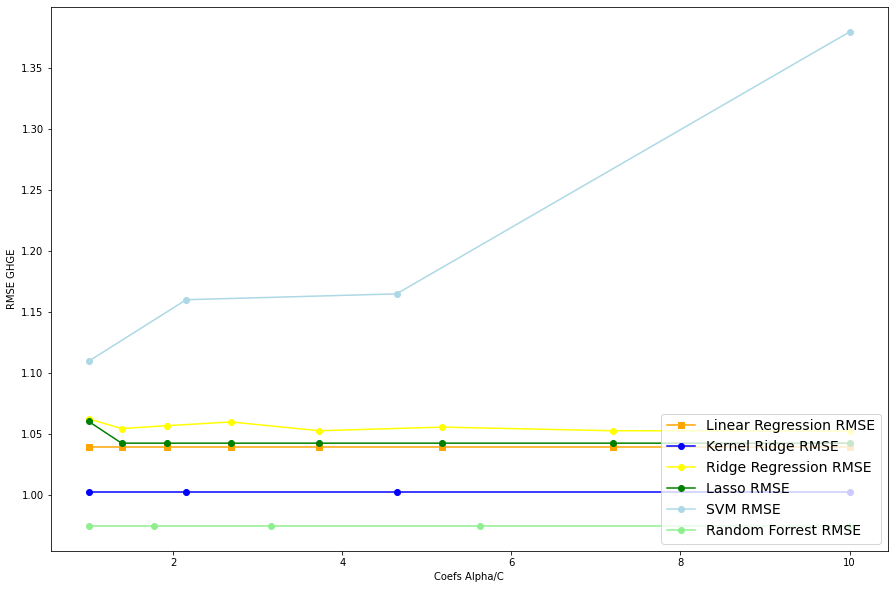

In [227]:
fig = plt.figure(figsize=(15, 10))
#np.logspace(-5, 5, 10),
print(rmseLinearSVR)
plt.plot(np.logspace(0, 1, 8), rmseLinearRegressionGHGE,  color="orange", marker='s', label="Linear Regression RMSE")
plt.plot(np.logspace(0, 1, 4), rmse_kernel_ridge_GHGE,  color="blue", marker='o', label="Kernel Ridge RMSE")
plt.plot(np.logspace(0, 1, 8), rmse_reg_ridge_GHGE,  color="yellow", marker='o', label="Ridge Regression RMSE")
plt.plot(np.logspace(0, 1, 8), rmselasso_GHGE,  color="green", marker='o', label="Lasso RMSE")
plt.plot(np.logspace(0, 1, 4), rmseLinearSVR_GHGE,  color="lightblue", marker='o', label="SVM RMSE")
plt.plot(np.logspace(0, 1, 5), (rmseRegressionTreeGHGE[0], rmseRegressionTreeGHGE[0], rmseRegressionTreeGHGE[0], rmseRegressionTreeGHGE[0], rmseRegressionTreeGHGE[0]) ,  color="lightgreen", marker='o', label="Random Forrest RMSE")

plt.legend(loc="lower right", fontsize=14)
plt.ylabel("RMSE GHGE")
plt.xlabel("Coefs Alpha/C")

# Y_pred with GFA

Text(0, 0.5, 'GHGE')

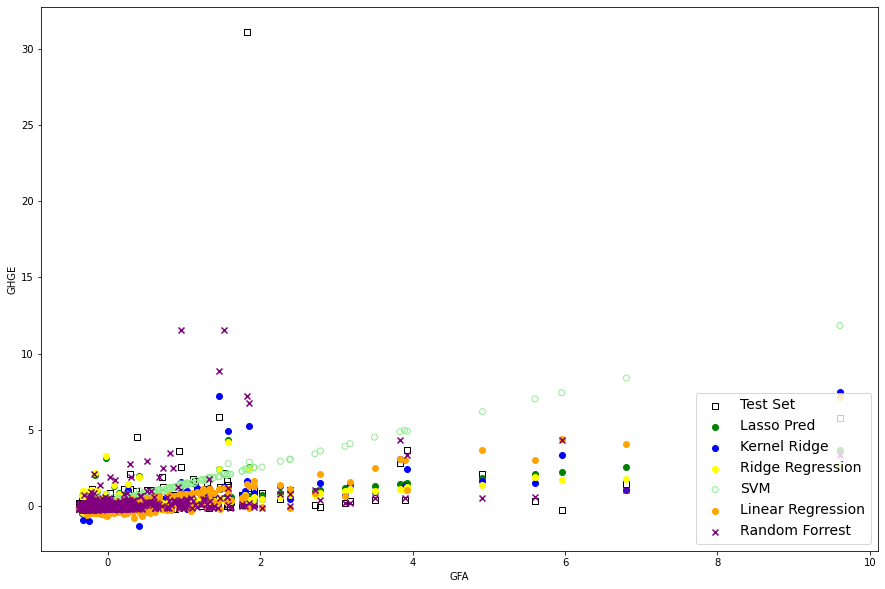

In [229]:
#A ajouter H2O pour aller à l'essentiel
#print(X_test[:, 1])
fig = plt.figure(figsize=(15, 10))
plt.scatter(X_test_ghge[:, 1], y_test_ghge, color="black", marker='s', label="Test Set", facecolors='none')
plt.scatter(X_test_ghge[:, 1], Y_pred_lasso_GHGE[scoreLasso_GHGE.index(max(scoreLasso_GHGE))], color="green", marker='o', label="Lasso Pred")
plt.scatter(X_test_ghge[:, 1], Y_pred_kernel_ridge_GHGE[score_kernel_ridge_GHGE.index(max(score_kernel_ridge_GHGE))], color="blue", marker='o', label="Kernel Ridge")
plt.scatter(X_test_ghge[:, 1], Y_pred_reg_ridge_GHGE[score_reg_ridge_GHGE.index(max(score_reg_ridge_GHGE))], color="yellow", marker='o', label="Ridge Regression")
plt.scatter(X_test_ghge[:, 1], Y_pred_svm_GHGE[scoreLinearSVR_GHGE.index(max(scoreLinearSVR_GHGE))], color="lightgreen", marker='o', label="SVM", facecolors='none')
plt.scatter(X_test_ghge[:, 1], Y_pred_GHGE[scoreLinearRegression.index(max(scoreLinearRegression))], color="orange", marker='o', label="Linear Regression")
plt.scatter(X_test_ghge[:, 1], Y_pred_RegressionTreeGHGE[scoreRegressionTreeGHGE.index(max(scoreRegressionTreeGHGE))], color="purple", marker='x', label="Random Forrest")
plt.legend(loc="lower right", fontsize=14)
#plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
#plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
#         (gridSearch.best_params_['gamma'], auc_cv))
#Ajout de la diagonale de 0.0 à 1.1
#plt.plot([0,1], [0, 1])
plt.xlabel("GFA")
plt.ylabel("GHGE")

# Multilayer Percpetron 

In [49]:
params_grid = {"alpha": list(np.logspace(0 ,1, 10)) , 
               "hidden_layer_sizes": list(range(1, 100, 10)), 
               "solver": ["lbfgs", "sgd", "adam"], 
               "activation" : ["identity", "logistic", "tanh", "relu"]}
rmseMultiPercpetron = []
scoreMultiPercpetron = []
Y_pred_MultiPercpetron = []
now = time.time()

for cv in range(2, 6):
    perceptCVMLP = GridSearchCV(neural_network.MLPClassifier(), params_grid, cv=cv)
    perceptCVMLP.fit(X_train, y_train.ravel())
    #Y_pred_MultiPercpetron.append(perceptCVMLP.predict(X_test))
    #scoreMultiPercpetron.append(perceptCVMLP.best_score_)
    #rmseMultiPercpetron.append(np.sqrt(metrics.mean_squared_error(y_test.ravel(), Y_pred_MultiPercpetron[-1])))
    
later = time.time()
difference = int(later - now)
print("Calculation Time", difference, "seconds")

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 364, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/Use

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 364, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/Use

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 364, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/Use

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 364, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/Use

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 364, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/Use

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 364, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/Use

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 364, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/Use

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 364, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/Use

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 364, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/Use

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

